<figure>
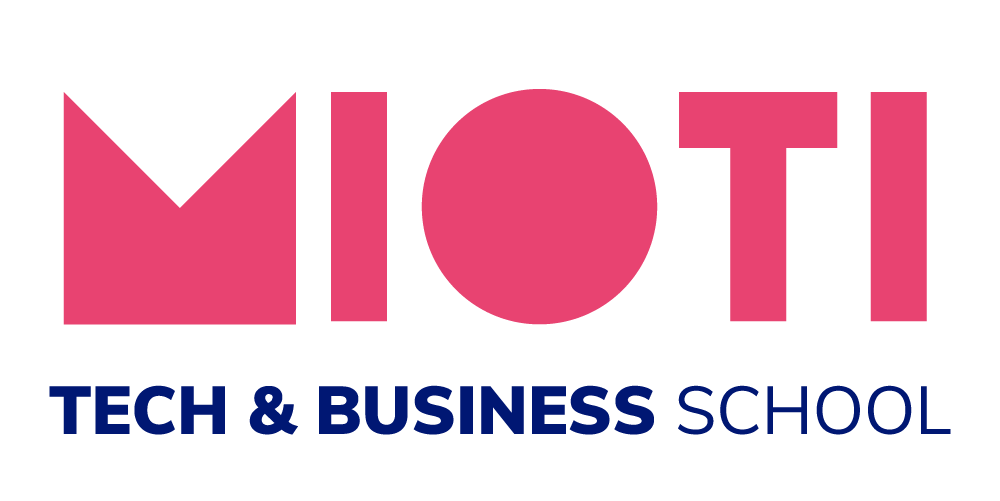
<figcaption></figure>

# Deep Learning

### Sequence Classification

## Objetivos

In this challenge, the Internet Movie Database (IMDb) will be used to create a model for classifying movie reviews as positive or negative. IMDb is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online.

Our goal is to improve a network designed for classifying IMDb sequences through regularization and the combination of different types of networks using Recurrent Neural Networks (RNNs). This implementation serves as a practical introduction to working with RNNs for sequence classification tasks, providing valuable experience in using TensorFlow and Keras for deep learning projects.

## 1. Environment Setup

Let's load the libraries and the database that we will use for the challenge.

In [2]:
# Importing the database
from tensorflow.keras.datasets import imdb

# Tensolflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout

# Other libraries
import matplotlib.pyplot as plt

In [3]:
max_features = 20000  # Maximum number of words to consider in the dataset
maxlen = 150  # Maximum number of words per review
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


## 2. Building the Model

In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad sequences to the same length
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer
model.add(LSTM(32))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
# Using a subset of the data for training and testing
x_train = x_train[1:2500, :]
y_train = y_train[1:2500]

x_test = x_test[1:2500, :]
y_test = y_test[1:2500]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
79/79 [==============================] - 10s 98ms/step - loss: 0.6914 - accuracy: 0.5202 - val_loss: 0.6874 - val_accuracy: 0.6202
Epoch 2/15
79/79 [==============================] - 6s 74ms/step - loss: 0.6227 - accuracy: 0.6815 - val_loss: 0.5772 - val_accuracy: 0.7235
Epoch 3/15
79/79 [==============================] - 7s 86ms/step - loss: 0.4321 - accuracy: 0.8219 - val_loss: 0.6704 - val_accuracy: 0.7083
Epoch 4/15
79/79 [==============================] - 6s 70ms/step - loss: 0.2798 - accuracy: 0.9048 - val_loss: 0.5595 - val_accuracy: 0.7807
Epoch 5/15
79/79 [==============================] - 6s 80ms/step - loss: 0.1747 - accuracy: 0.9452 - val_loss: 0.4787 - val_accuracy: 0.8135
Epoch 6/15
79/79 [==============================] - 6s 73ms/step - loss: 0.1116 - accuracy: 0.9684 - val_loss: 0.5979 - val_accuracy: 0.8007
Epoch 7/15
79/79 [=========================

## 3. Performance Analysis

To enhance our evaluation of the model's performance, let's retrain the network and incorporate graphical visualizations. We will display and analyze the training curves to gain deeper insights into the model's behavior and effectiveness.

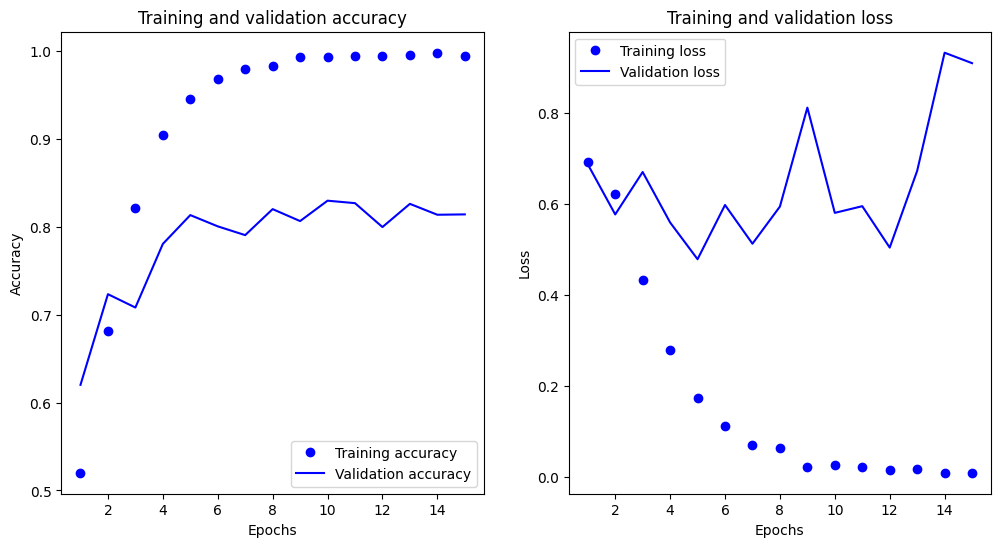

79/79 [==============================] - 1s 14ms/step - loss: 0.9096 - accuracy: 0.8143
Test score: 0.909634530544281
Test accuracy: 0.814325749874115


In [5]:
# Plot training curves
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

The results of our model do not have the desired performance. We observe that the model generally works quite well with the training data, but the quality of the results decreases considerably with the validation data, which could indicate overfitting. Additionally, we have a test score of 87.5%, which means the loss in the model is quite high despite an accuracy of 81.4%.

## 4. Adding Dropout layers

Let's start by modifying the code to add Dropout, which should ideally improve training and reduce overfitting. For that, a dropout will be added to the Embedding layer with a probability of 40% and another to the LSTM layer with a probability of 40%.

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 63s 79ms/step - loss: 0.4649 - accuracy: 0.7664 - val_loss: 0.3530 - val_accuracy: 0.8492
Epoch 2/15
782/782 [==============================] - 61s 78ms/step - loss: 0.2957 - accuracy: 0.8829 - val_loss: 0.3158 - val_accuracy: 0.8717
Epoch 3/15
782/782 [==============================] - 60s 76ms/step - loss: 0.2519 - accuracy: 0.8997 - val_loss: 0.3152 - val_accuracy: 0.8618
Epoch 4/15
782/782 [==============================] - 70s 90ms/step - loss: 0.2327 - accuracy: 0.9142 - val_loss: 0.3201 - val_accuracy: 0.8687
Epoch 5/15
782/782 [==============================] - 70s 90ms/step - loss: 0.2119 - accuracy: 0.9216 - val_loss: 0.3129 - val_accuracy: 0.8667
Epoch 6/15
782/782 [==============================] - 60s 77ms/step - loss: 0.1961 - accuracy: 0.9306 - val_los

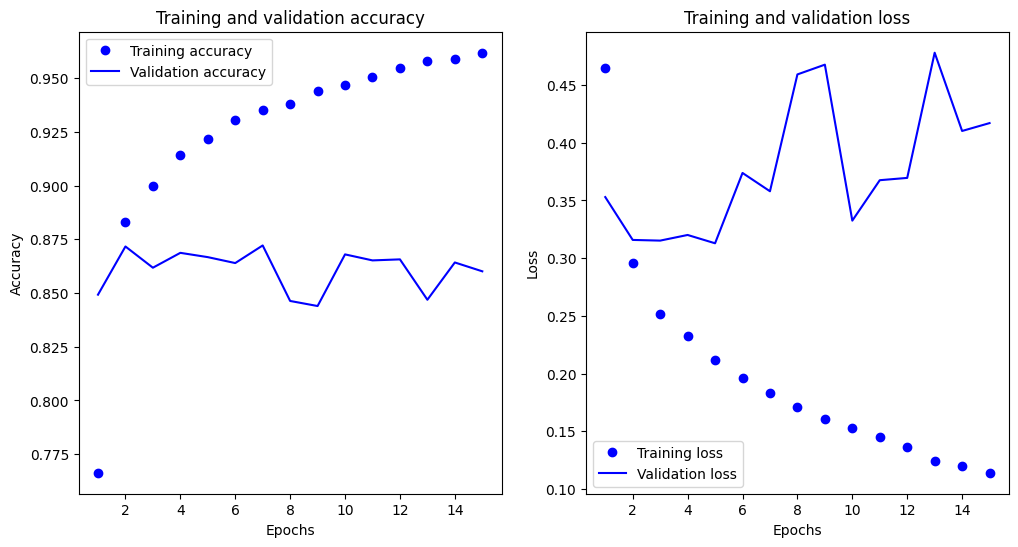

782/782 [==============================] - 12s 15ms/step - loss: 0.4170 - accuracy: 0.8601
Test score: 0.4170362949371338
Test accuracy: 0.8601199984550476


In [6]:
max_features = 20000  # Maximum number of words to consider in the dataset
maxlen = 150  # Maximum number of words per review
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad sequences to the same length
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.4))  # Add dropout to the embedding layer with a 40% probability
model.add(LSTM(32))
model.add(Dropout(0.4))  # Add dropout to the LSTM layer with a 40% probability
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

# Plot training curves
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Now we see that the model improves slightly with a higher accuracy and a much lower score than before. We also observe that the training and validation graphs are closer, but we can still improve the results.

## CNNs + LSTMs + DNNs combined

In this section, we will make a more complex modification to our base system by combining Convolutional Neural Networks (CNNs), Long Short-Term Memory (LSTM) networks, and Deep Neural Networks (DNNs).

- CNNs: Great for feature extraction from local receptive fields in input data, inspired by human vision.
- LSTMs: Excellent for modeling sequences, learning from past data and maintaining context.
- DNNs: Effective at learning non-linear transformations, used to convert LSTM outputs into solutions.

This combination leverages the strengths of each type of network to improve our model's performance. We will modify the code to add the necessary layers and train the model, showing and analyzing the training curves.



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 124s 155ms/step - loss: 0.4421 - accuracy: 0.7790 - val_loss: 0.3089 - val_accuracy: 0.8682
Epoch 2/15
782/782 [==============================] - 120s 153ms/step - loss: 0.2654 - accuracy: 0.8958 - val_loss: 0.3158 - val_accuracy: 0.8718
Epoch 3/15
782/782 [==============================] - 103s 132ms/step - loss: 0.2110 - accuracy: 0.9180 - val_loss: 0.3420 - val_accuracy: 0.8558
Epoch 4/15
782/782 [==============================] - 120s 153ms/step - loss: 0.1706 - accuracy: 0.9384 - val_loss: 0.3485 - val_accuracy: 0.8654
Epoch 5/15
782/782 [==============================] - 120s 153ms/step - loss: 0.1377 - accuracy: 0.9517 - val_loss: 0.4420 - val_accuracy: 0.8432
Epoch 6/15
782/782 [==============================] - 119s 152ms/step - loss: 0.1100 - accuracy: 0.96

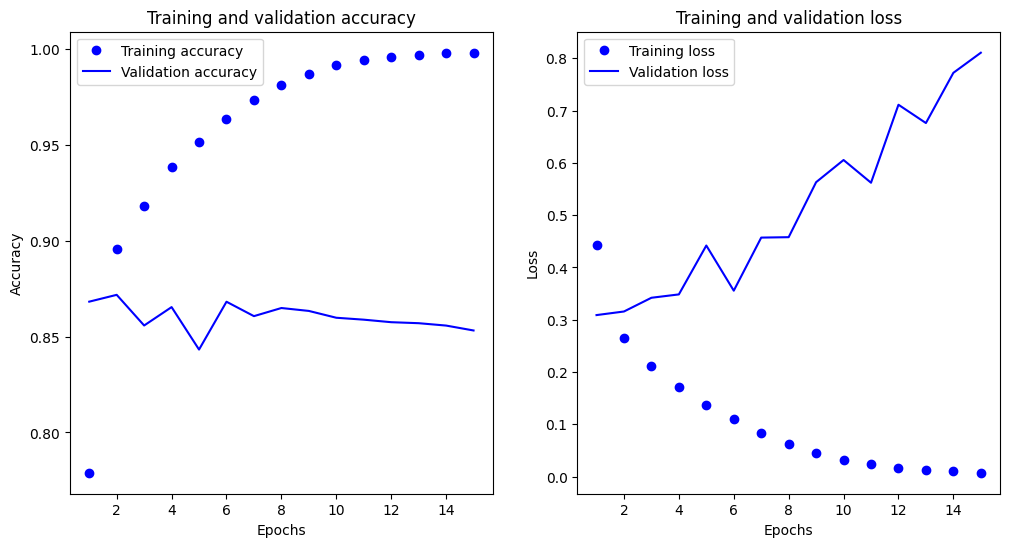

782/782 [==============================] - 28s 35ms/step - loss: 0.8108 - accuracy: 0.8532
Test score: 0.8107982873916626
Test accuracy: 0.8532000184059143


In [8]:
max_features = 20000  # Maximum number of words to consider in the dataset
maxlen = 150  # Maximum number of words per review
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad sequences to the same length
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer as in the original
model.add(Conv1D(32, 3, activation='relu'))  # Added Conv1D layer
model.add(MaxPooling1D(2))  # Added MaxPooling1D layer
model.add(LSTM(128))  # Changed LSTM layer size to 128
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

# Plot training curves
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

We observe that the results have worsened in both accuracy and loss compared to the previous model, especially in the last two epochs where the quality significantly decreases. This increased training time without better results indicates inefficiencies.

## Results optimization

Now, we'll try to optimize our neural network's performance by applying some callbacks and focusing on using all available data and determining the optimal number of epochs and learning rate (LR).

We added the following callbacks to optimize training:

- ReduceLROnPlateau: Adjusts the learning rate when the validation loss plateaus.
- EarlyStopping: Stops training early if the validation loss does not improve for 10 epochs, restoring the best weights.
- ModelCheckpoint: Saves the best model based on validation loss during training.

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 77s 95ms/step - loss: 0.4569 - accuracy: 0.7772 - val_loss: 0.3718 - val_accuracy: 0.8453 - lr: 0.0010
Epoch 2/15
  3/782 [..............................] - ETA: 44s - loss: 0.2488 - accuracy: 0.8958

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 62s 79ms/step - loss: 0.2930 - accuracy: 0.8845 - val_loss: 0.3157 - val_accuracy: 0.8715 - lr: 0.0010
Epoch 3/15
782/782 [==============================] - 61s 78ms/step - loss: 0.2559 - accuracy: 0.9024 - val_loss: 0.4316 - val_accuracy: 0.8502 - lr: 0.0010
Epoch 4/15
782/782 [==============================] - 71s 91ms/step - loss: 0.2342 - accuracy: 0.9113 - val_loss: 0.3867 - val_accuracy: 0.8576 - lr: 0.0010
Epoch 5/15
782/782 [==============================] - 61s 78ms/step - loss: 0.2152 - accuracy: 0.9198 - val_loss: 0.3913 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 6/15
782/782 [==============================] - 62s 79ms/step - loss: 0.1971 - accuracy: 0.9275 - val_loss: 0.4417 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 7/15
782/782 [==============================] - 62s 80ms/step - loss: 0.1848 - accuracy: 0.9336 - val_loss: 0.3868 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 8/15
782/782 [==============================] - 72s 92ms/step -

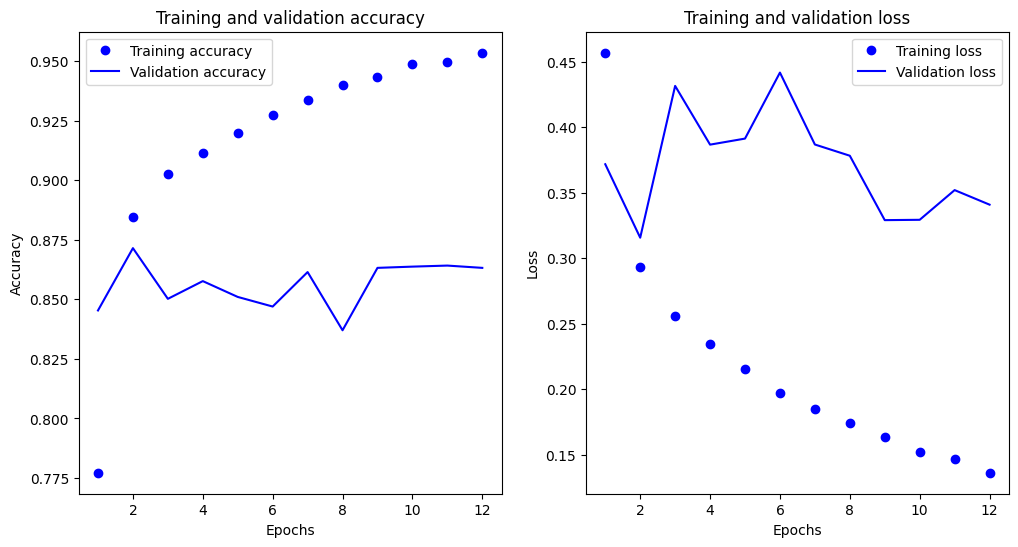

782/782 [==============================] - 13s 16ms/step - loss: 0.3157 - accuracy: 0.8715
Test score: 0.31569528579711914
Test accuracy: 0.8714799880981445


In [9]:
max_features = 20000  # Maximum number of words to consider in the dataset
maxlen = 150  # Maximum number of words per review
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad sequences to the same length
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer
model.add(Dropout(0.4))  # Add dropout to the embedding layer with a 40% probability
model.add(LSTM(32))  # LSTM layer
model.add(Dropout(0.4))  # Add dropout to the LSTM layer with a 40% probability
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### CALLBACKS #####
# Add ReduceLROnPlateau callback to adjust learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Add EarlyStopping callback to stop training early
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Add ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[reduce_lr, early_stopping, model_checkpoint])

# Plot training curves
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)